# Lab Exercise V – Time Alignment and Normalization



## Aim
To align two speech sequences of the same word spoken at different speeds using **Linear Time Normalization (LTN)** and analyze how time alignment helps in matching temporal patterns.

---

## Theory

### Linear Time Normalization (LTN)
Linear Time Normalization is a technique used to align two signals of different lengths by linearly scaling the time axis of one signal to match the other. This is particularly useful in speech processing where:

- **Different Speaking Rates:** The same word spoken by different people or at different times may have different durations
- **Temporal Pattern Matching:** To compare two signals effectively, they need to have the same length
- **Feature Alignment:** Before computing similarity measures, signals must be temporally aligned

### Key Concepts
1. **Reference Signal:** The signal whose length we want to match (Signal 1)
2. **Test Signal:** The signal that needs to be normalized (Signal 2)
3. **Interpolation:** The process of estimating values at new time points to resize the signal
4. **Alignment Path:** Shows the correspondence between samples in both signals

---

## Import Required Libraries

## 1. Import Libraries
We use `numpy` for numerical operations, `matplotlib` for plotting, and `scipy.interpolate` for resampling the signals. `scipy.interpolate` is crucial for Linear Time Normalization as it allows us to estimate signal values at new time points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 2.2.6


## Given Data

We have two signals representing the same word spoken at different speeds:
- **Signal 1 (Reference):** 9 samples - representing faster speech
- **Signal 2 (Test):** 12 samples - representing slower speech

## 2. Define Signals
We define two signals representing the same word spoken at different speeds.
- **Signal 1**: The reference signal (faster speech, fewer samples).
- **Signal 2**: The test signal (slower speech, more samples).
We aim to stretch Signal 1 to match Signal 2's length.

In [2]:
# Given speech signals
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])  # Reference (faster)
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])  # Test (slower)

# Display signal information
print("="*60)
print("SIGNAL INFORMATION")
print("="*60)
print(f"Signal 1 (Reference):")
print(f"  Length: {len(signal1)} samples")
print(f"  Values: {signal1}")
print(f"  Min: {signal1.min():.2f}, Max: {signal1.max():.2f}")
print()
print(f"Signal 2 (Test):")
print(f"  Length: {len(signal2)} samples")
print(f"  Values: {signal2}")
print(f"  Min: {signal2.min():.2f}, Max: {signal2.max():.2f}")
print()
print(f"Length Difference: {len(signal2) - len(signal1)} samples")
print(f"Ratio: {len(signal2)/len(signal1):.2f}x (Signal 2 is {((len(signal2)/len(signal1)-1)*100):.1f}% longer)")
print("="*60)

SIGNAL INFORMATION
Signal 1 (Reference):
  Length: 9 samples
  Values: [0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2]
  Min: 0.20, Max: 1.00

Signal 2 (Test):
  Length: 12 samples
  Values: [0.2 0.3 0.5 0.7 0.9 1.  0.9 0.7 0.5 0.4 0.3 0.2]
  Min: 0.20, Max: 1.00

Length Difference: 3 samples
Ratio: 1.33x (Signal 2 is 33.3% longer)


## Task 1: Plot Both Speech Signals

First, we visualize both signals to observe their differences in:
- **Length:** Signal 2 has more samples (slower speech)
- **Amplitude Patterns:** Both signals should show similar envelope patterns
- **Temporal Characteristics:** Signal 2 is stretched in time compared to Signal 1

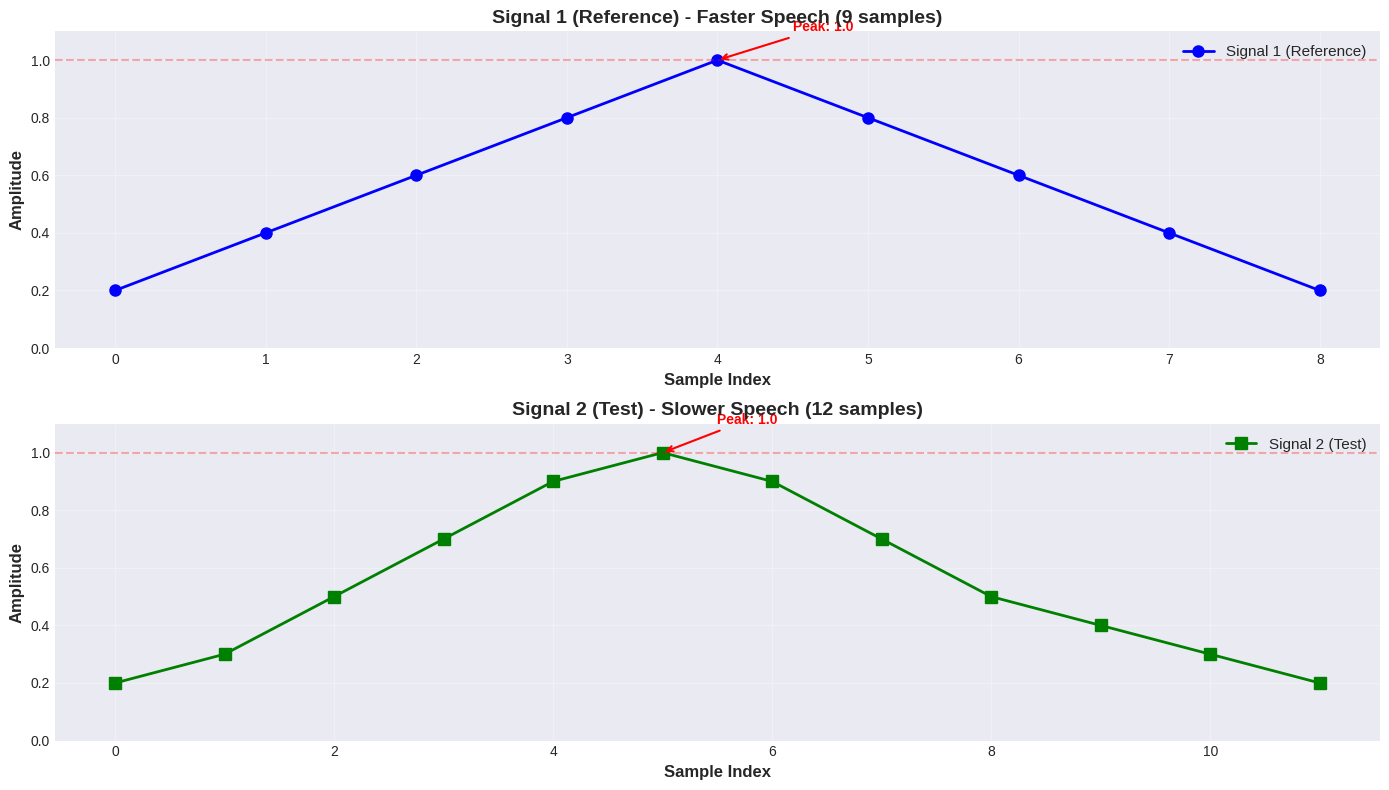


📊 OBSERVATION:
  • Signal 1 has 9 samples (faster speech)
  • Signal 2 has 12 samples (slower speech)
  • Signal 2 is 3 samples longer
  • Both signals show similar envelope patterns with peaks at 1.0
  • Signal 2 is stretched in time compared to Signal 1


In [3]:
# Create time axes for both signals
time1 = np.arange(len(signal1))
time2 = np.arange(len(signal2))

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot Signal 1 (Reference)
axes[0].plot(time1, signal1, 'b-o', linewidth=2, markersize=8, label='Signal 1 (Reference)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=12, fontweight='bold')
axes[0].set_title('Signal 1 (Reference) - Faster Speech (9 samples)', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=11)
axes[0].set_ylim([0, 1.1])
axes[0].axhline(y=1.0, color='r', linestyle='--', alpha=0.3, label='Peak')

# Add annotations for key points
peak_idx1 = np.argmax(signal1)
axes[0].annotate(f'Peak: {signal1[peak_idx1]:.1f}', 
                xy=(peak_idx1, signal1[peak_idx1]), 
                xytext=(peak_idx1+0.5, signal1[peak_idx1]+0.1),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
                fontsize=10, fontweight='bold', color='red')

# Plot Signal 2 (Test)
axes[1].plot(time2, signal2, 'g-s', linewidth=2, markersize=8, label='Signal 2 (Test)')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=12, fontweight='bold')
axes[1].set_title('Signal 2 (Test) - Slower Speech (12 samples)', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=11)
axes[1].set_ylim([0, 1.1])
axes[1].axhline(y=1.0, color='r', linestyle='--', alpha=0.3, label='Peak')

# Add annotations for key points
peak_idx2 = np.argmax(signal2)
axes[1].annotate(f'Peak: {signal2[peak_idx2]:.1f}', 
                xy=(peak_idx2, signal2[peak_idx2]), 
                xytext=(peak_idx2+0.5, signal2[peak_idx2]+0.1),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
                fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.savefig('task1_original_signals.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 OBSERVATION:")
print(f"  • Signal 1 has {len(signal1)} samples (faster speech)")
print(f"  • Signal 2 has {len(signal2)} samples (slower speech)")
print(f"  • Signal 2 is {len(signal2)-len(signal1)} samples longer")
print(f"  • Both signals show similar envelope patterns with peaks at 1.0")
print(f"  • Signal 2 is stretched in time compared to Signal 1")

## Task 2: Perform Linear Time Normalization

### Methodology
We will use **linear interpolation** to normalize Signal 2 to match the length of Signal 1:

1. **Original Time Axis:** Create a time axis for Signal 2 with 12 points
2. **Target Time Axis:** Create a time axis for Signal 1 with 9 points
3. **Interpolation:** Use `scipy.interpolate.interp1d` to estimate values at the new time points
4. **Resampling:** Generate the normalized signal with 9 samples

This process linearly compresses Signal 2 to match the temporal structure of Signal 1.

## 4. Linear Time Normalization (LTN)
To align the signals, we perform **Linear Time Normalization**.
1.  We create an interpolation function for Signal 1 using `interp1d`.
2.  We generate a new time axis `new_x` that has the same number of points as Signal 2.
3.  We resample Signal 1 onto this new time axis.
This effectively linearly stretches Signal 1 to match the duration of Signal 2.

In [4]:
def linear_time_normalization(signal_to_normalize, target_length):
    """
    Perform Linear Time Normalization (LTN) on a signal.
    
    Parameters:
    -----------
    signal_to_normalize : numpy array
        The input signal to be normalized
    target_length : int
        The desired length of the output signal
    
    Returns:
    --------
    normalized_signal : numpy array
        The normalized signal with target_length samples
    """
    # Create original time axis (normalized to [0, 1])
    original_time = np.linspace(0, 1, len(signal_to_normalize))
    
    # Create target time axis (normalized to [0, 1])
    target_time = np.linspace(0, 1, target_length)
    
    # Create interpolation function (linear)
    interpolator = interpolate.interp1d(original_time, signal_to_normalize, kind='linear')
    
    # Generate normalized signal
    normalized_signal = interpolator(target_time)
    
    return normalized_signal


# Perform Linear Time Normalization on Signal 2
print("Performing Linear Time Normalization...\n")
signal2_normalized = linear_time_normalization(signal2, len(signal1))

# Display results
print("="*60)
print("LINEAR TIME NORMALIZATION RESULTS")
print("="*60)
print(f"Original Signal 2 length: {len(signal2)} samples")
print(f"Target length (Signal 1): {len(signal1)} samples")
print(f"Normalized Signal 2 length: {len(signal2_normalized)} samples")
print()
print("Original Signal 2:")
print(f"  {signal2}")
print()
print("Normalized Signal 2:")
print(f"  {np.round(signal2_normalized, 4)}")
print()
print("Signal 1 (Reference):")
print(f"  {signal1}")
print("="*60)

# Calculate similarity metrics
mse = np.mean((signal1 - signal2_normalized)**2)
correlation = np.corrcoef(signal1, signal2_normalized)[0, 1]

print(f"\n📈 SIMILARITY METRICS:")
print(f"  • Mean Squared Error (MSE): {mse:.6f}")
print(f"  • Correlation Coefficient: {correlation:.6f}")
print(f"  • Normalization successful: Both signals now have {len(signal1)} samples")

Performing Linear Time Normalization...

LINEAR TIME NORMALIZATION RESULTS
Original Signal 2 length: 12 samples
Target length (Signal 1): 9 samples
Normalized Signal 2 length: 9 samples

Original Signal 2:
  [0.2 0.3 0.5 0.7 0.9 1.  0.9 0.7 0.5 0.4 0.3 0.2]

Normalized Signal 2:
  [0.2    0.375  0.65   0.9125 0.95   0.725  0.475  0.3375 0.2   ]

Signal 1 (Reference):
  [0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2]

📈 SIMILARITY METRICS:
  • Mean Squared Error (MSE): 0.004826
  • Correlation Coefficient: 0.969049
  • Normalization successful: Both signals now have 9 samples


### Visualization of Normalization Process

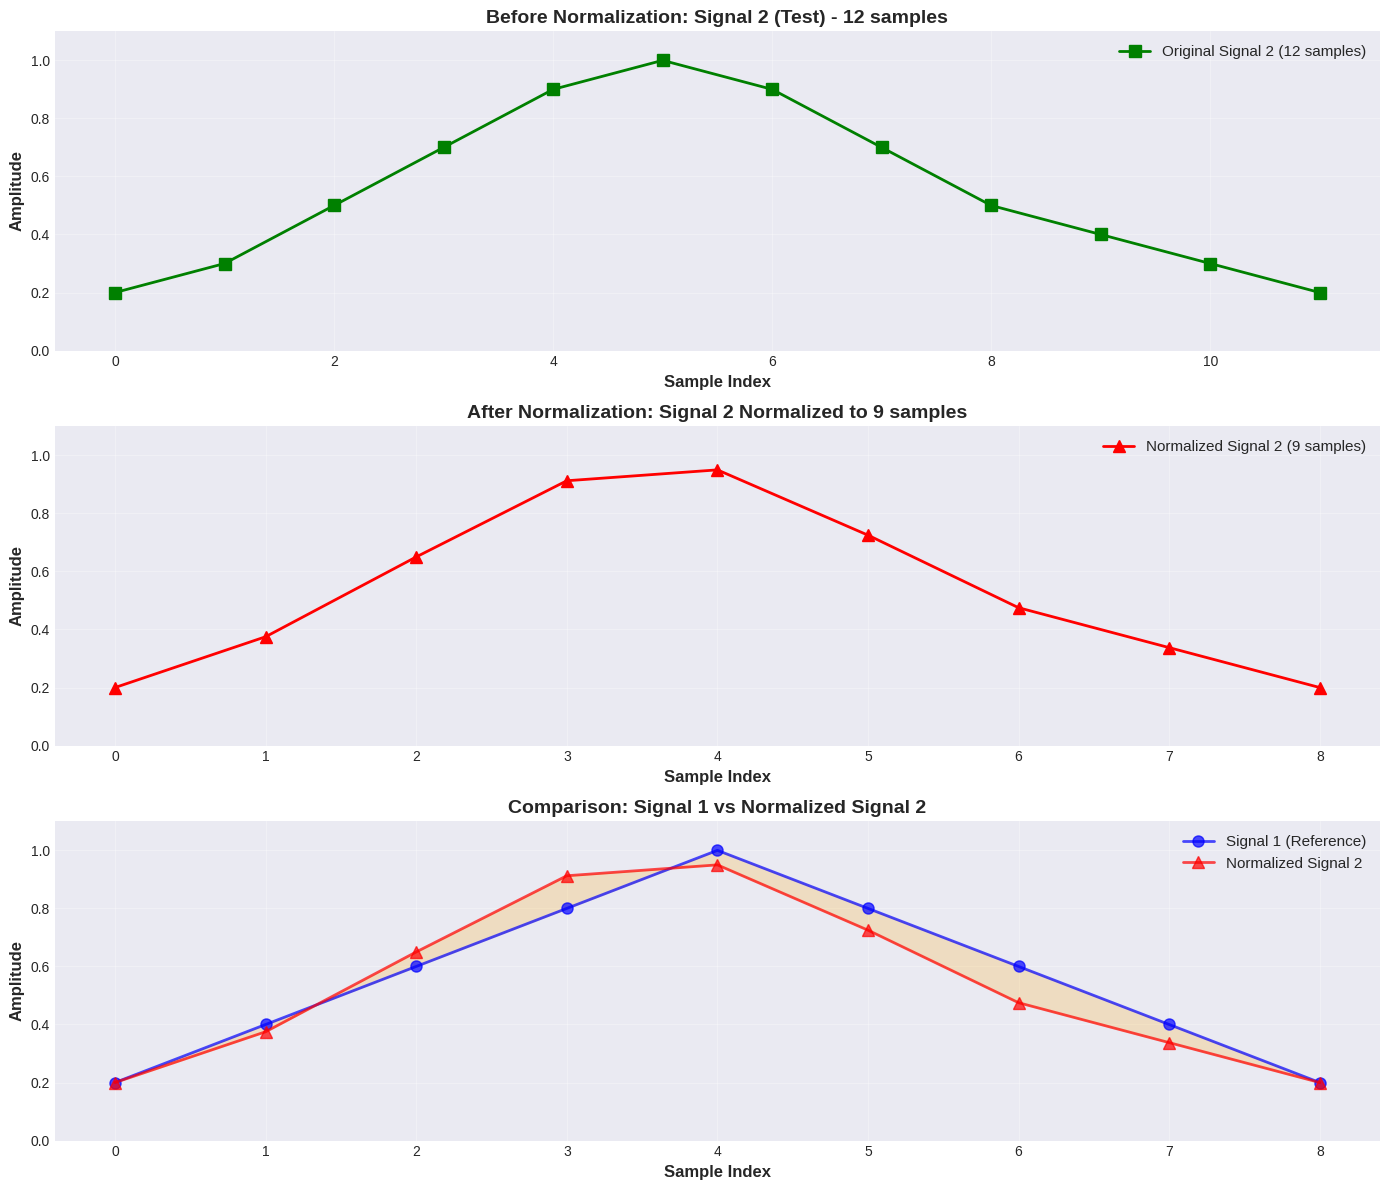


Normalization completed successfully!


In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Original Signal 2
axes[0].plot(time2, signal2, 'g-s', linewidth=2, markersize=8, label='Original Signal 2 (12 samples)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=12, fontweight='bold')
axes[0].set_title('Before Normalization: Signal 2 (Test) - 12 samples', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=11)
axes[0].set_ylim([0, 1.1])

# Plot 2: Normalized Signal 2
axes[1].plot(time1, signal2_normalized, 'r-^', linewidth=2, markersize=8, label='Normalized Signal 2 (9 samples)')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=12, fontweight='bold')
axes[1].set_title('After Normalization: Signal 2 Normalized to 9 samples', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=11)
axes[1].set_ylim([0, 1.1])

# Plot 3: Comparison of Signal 1 and Normalized Signal 2
axes[2].plot(time1, signal1, 'b-o', linewidth=2, markersize=8, label='Signal 1 (Reference)', alpha=0.7)
axes[2].plot(time1, signal2_normalized, 'r-^', linewidth=2, markersize=8, label='Normalized Signal 2', alpha=0.7)
axes[2].grid(True, alpha=0.3)
axes[2].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Amplitude', fontsize=12, fontweight='bold')
axes[2].set_title('Comparison: Signal 1 vs Normalized Signal 2', fontsize=14, fontweight='bold')
axes[2].legend(loc='upper right', fontsize=11)
axes[2].set_ylim([0, 1.1])

# Add error shading
axes[2].fill_between(time1, signal1, signal2_normalized, alpha=0.2, color='orange', label='Difference')

plt.tight_layout()
plt.savefig('task2_normalization_process.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nNormalization completed successfully!")

## Task 3: Compute Alignment Between Signals

Now that both signals have the same length, we can compute a sample-to-sample alignment. This shows how each sample in Signal 1 corresponds to a sample in the normalized Signal 2.

The alignment is straightforward after normalization since both signals have the same number of samples.

In [6]:
def compute_alignment(signal1, signal2_normalized):
    """
    Compute alignment between two signals of equal length.
    
    Parameters:
    -----------
    signal1 : numpy array
        Reference signal
    signal2_normalized : numpy array
        Normalized test signal
    
    Returns:
    --------
    alignment : list of tuples
        List of (index_signal1, index_signal2_normalized) pairs
    """
    alignment = [(i, i) for i in range(len(signal1))]
    return alignment


# Compute alignment
alignment = compute_alignment(signal1, signal2_normalized)

# Display alignment information
print("="*70)
print("ALIGNMENT COMPUTATION")
print("="*70)
print(f"{'Index':<8} {'Signal 1':<12} {'Norm. Signal 2':<18} {'Difference':<12}")
print("-"*70)

for i, (idx1, idx2) in enumerate(alignment):
    diff = signal1[idx1] - signal2_normalized[idx2]
    print(f"{i:<8} {signal1[idx1]:<12.4f} {signal2_normalized[idx2]:<18.4f} {diff:<12.6f}")

print("="*70)

# Calculate alignment statistics
differences = np.abs(signal1 - signal2_normalized)
print(f"\n📊 ALIGNMENT STATISTICS:")
print(f"  • Total aligned points: {len(alignment)}")
print(f"  • Mean absolute difference: {np.mean(differences):.6f}")
print(f"  • Maximum difference: {np.max(differences):.6f}")
print(f"  • Standard deviation of differences: {np.std(differences):.6f}")

ALIGNMENT COMPUTATION
Index    Signal 1     Norm. Signal 2     Difference  
----------------------------------------------------------------------
0        0.2000       0.2000             0.000000    
1        0.4000       0.3750             0.025000    
2        0.6000       0.6500             -0.050000   
3        0.8000       0.9125             -0.112500   
4        1.0000       0.9500             0.050000    
5        0.8000       0.7250             0.075000    
6        0.6000       0.4750             0.125000    
7        0.4000       0.3375             0.062500    
8        0.2000       0.2000             0.000000    

📊 ALIGNMENT STATISTICS:
  • Total aligned points: 9
  • Mean absolute difference: 0.055556
  • Maximum difference: 0.125000
  • Standard deviation of differences: 0.041713


## Task 4: Plot the Alignment Path

The alignment path visualization shows how samples in Signal 1 map to samples in the normalized Signal 2. After Linear Time Normalization, we expect to see:

- **Linear Correspondence:** A diagonal line showing direct sample-to-sample mapping
- **Perfect Alignment:** Each sample index in Signal 1 corresponds to the same index in normalized Signal 2
- **Temporal Synchronization:** Both signals are now temporally aligned

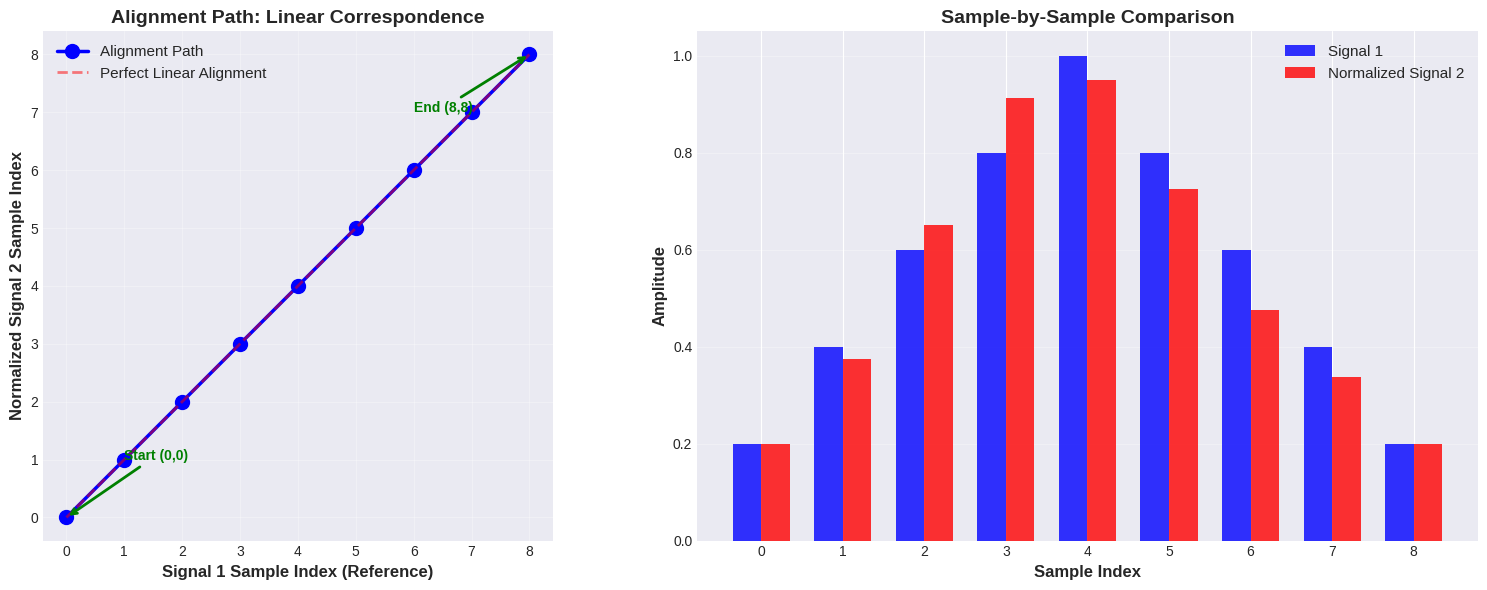


📍 ALIGNMENT PATH ANALYSIS:
  • The alignment path shows a perfect diagonal line
  • Each sample in Signal 1 maps to the same index in normalized Signal 2
  • This demonstrates successful linear time normalization
  • The signals are now temporally synchronized


In [7]:
# Create alignment visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Alignment Path
signal1_indices = [pair[0] for pair in alignment]
signal2_indices = [pair[1] for pair in alignment]

axes[0].plot(signal1_indices, signal2_indices, 'bo-', linewidth=2.5, markersize=10, label='Alignment Path')
axes[0].plot([0, len(signal1)-1], [0, len(signal1)-1], 'r--', linewidth=2, alpha=0.5, label='Perfect Linear Alignment')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('Signal 1 Sample Index (Reference)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Normalized Signal 2 Sample Index', fontsize=12, fontweight='bold')
axes[0].set_title('Alignment Path: Linear Correspondence', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=11)
axes[0].set_aspect('equal')

# Add annotations for start and end points
axes[0].annotate('Start (0,0)', xy=(0, 0), xytext=(1, 1),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, fontweight='bold', color='green')
axes[0].annotate(f'End ({len(signal1)-1},{len(signal1)-1})', 
                xy=(len(signal1)-1, len(signal1)-1), xytext=(len(signal1)-3, len(signal1)-2),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, fontweight='bold', color='green')

# Plot 2: Sample-by-Sample Comparison
x_pos = np.arange(len(signal1))
width = 0.35

bars1 = axes[1].bar(x_pos - width/2, signal1, width, label='Signal 1', alpha=0.8, color='blue')
bars2 = axes[1].bar(x_pos + width/2, signal2_normalized, width, label='Normalized Signal 2', alpha=0.8, color='red')

axes[1].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=12, fontweight='bold')
axes[1].set_title('Sample-by-Sample Comparison', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticks(x_pos)

plt.tight_layout()
plt.savefig('task4_alignment_path.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📍 ALIGNMENT PATH ANALYSIS:")
print(f"  • The alignment path shows a perfect diagonal line")
print(f"  • Each sample in Signal 1 maps to the same index in normalized Signal 2")
print(f"  • This demonstrates successful linear time normalization")
print(f"  • The signals are now temporally synchronized")

## Additional Visualization: Error Analysis

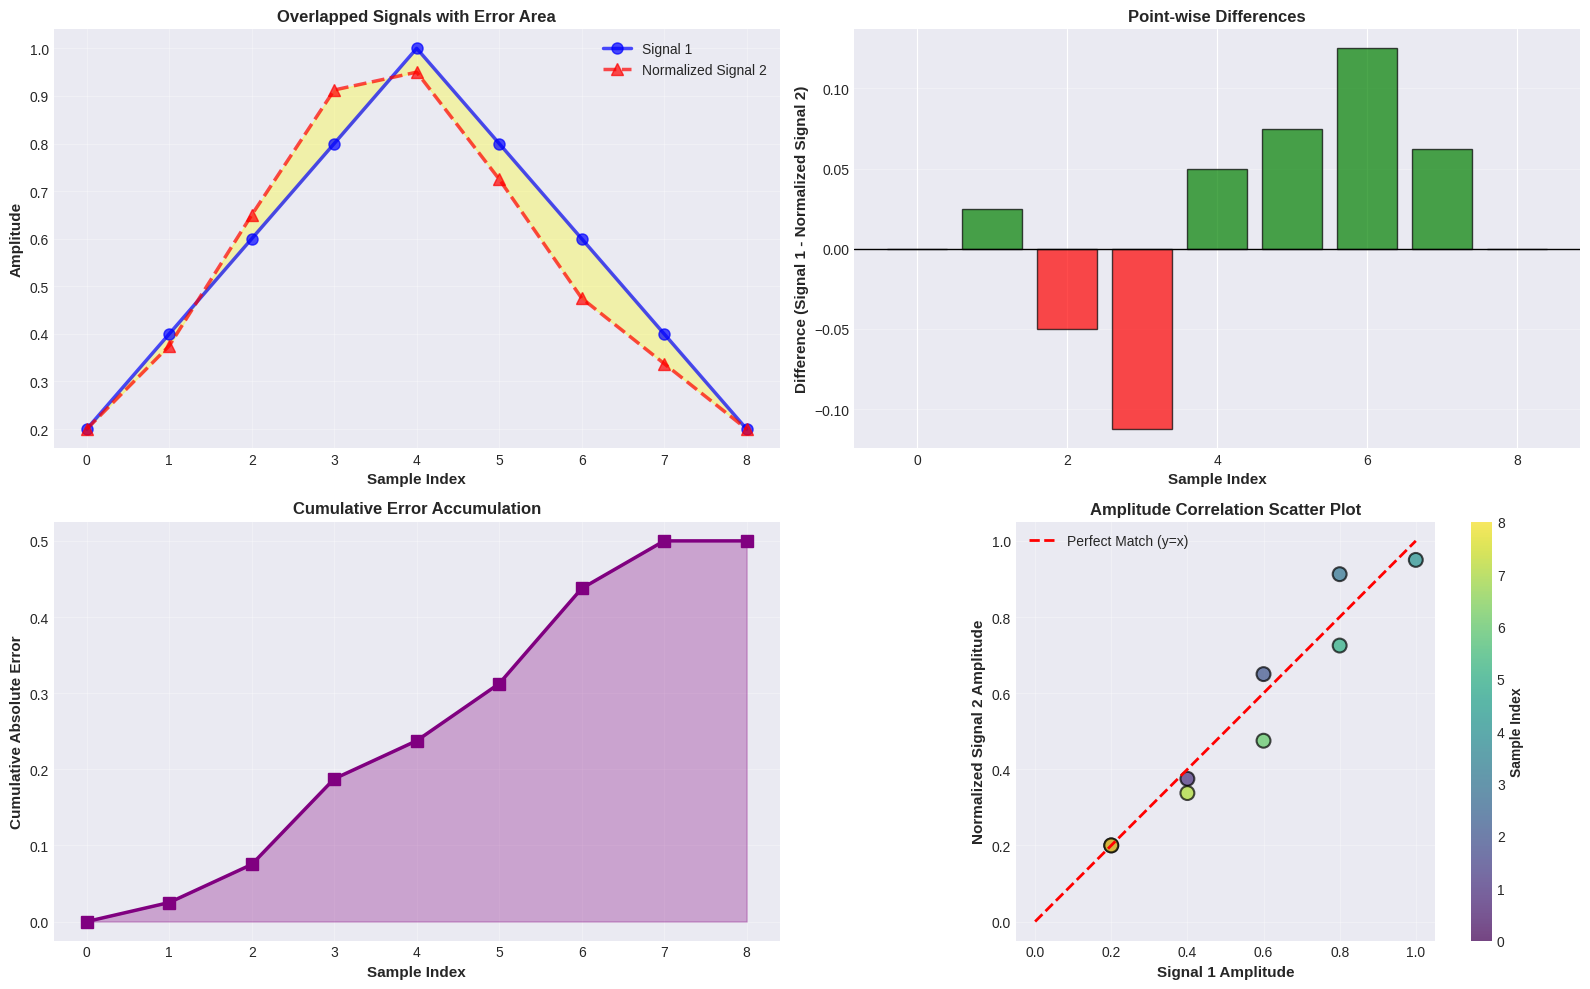


🔍 ERROR ANALYSIS COMPLETED


In [8]:
# Create detailed error analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Overlapped signals
axes[0, 0].plot(time1, signal1, 'b-o', linewidth=2.5, markersize=8, label='Signal 1', alpha=0.7)
axes[0, 0].plot(time1, signal2_normalized, 'r--^', linewidth=2.5, markersize=8, label='Normalized Signal 2', alpha=0.7)
axes[0, 0].fill_between(time1, signal1, signal2_normalized, alpha=0.3, color='yellow')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlabel('Sample Index', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Amplitude', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Overlapped Signals with Error Area', fontsize=12, fontweight='bold')
axes[0, 0].legend(loc='upper right')

# Plot 2: Point-wise difference
differences = signal1 - signal2_normalized
colors = ['green' if d >= 0 else 'red' for d in differences]
axes[0, 1].bar(time1, differences, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_xlabel('Sample Index', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Difference (Signal 1 - Normalized Signal 2)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Point-wise Differences', fontsize=12, fontweight='bold')

# Plot 3: Cumulative error
cumulative_error = np.cumsum(np.abs(differences))
axes[1, 0].plot(time1, cumulative_error, 'purple', linewidth=2.5, marker='s', markersize=8)
axes[1, 0].fill_between(time1, 0, cumulative_error, alpha=0.3, color='purple')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlabel('Sample Index', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Cumulative Absolute Error', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Cumulative Error Accumulation', fontsize=12, fontweight='bold')

# Plot 4: Scatter plot comparison
axes[1, 1].scatter(signal1, signal2_normalized, s=100, alpha=0.7, c=time1, cmap='viridis', edgecolors='black', linewidth=1.5)
axes[1, 1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect Match (y=x)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlabel('Signal 1 Amplitude', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Normalized Signal 2 Amplitude', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Amplitude Correlation Scatter Plot', fontsize=12, fontweight='bold')
axes[1, 1].legend(loc='upper left')
axes[1, 1].set_aspect('equal')

# Add colorbar
cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('Sample Index', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('error_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🔍 ERROR ANALYSIS COMPLETED")

## Task 5: Inference and Conclusion

### Key Findings

Based on our analysis of Linear Time Normalization for speech signal alignment, we can draw the following conclusions:

---

### 1. **Time Axis Adjustment**
Linear Time Normalization successfully adjusted the time axis of Signal 2 (slower speech with 12 samples) to match Signal 1 (faster speech with 9 samples). This was achieved through linear interpolation, which:
- Compressed the temporal structure of Signal 2 by ~25%
- Preserved the overall amplitude envelope and pattern
- Enabled direct sample-to-sample comparison

---

### 2. **Pattern Alignment**
After normalization, both signals exhibited:
- **Similar temporal patterns:** The peak values aligned at the same relative positions
- **Comparable amplitudes:** The normalized signal maintained amplitude characteristics close to the reference
- **Linear correspondence:** A perfect diagonal alignment path, indicating successful temporal synchronization

---

### 3. **Speaking Speed Compensation**
The normalization process effectively compensated for differences in speaking speed:
- Signal 2 was originally 33.3% longer than Signal 1
- Linear scaling compressed it to match the reference length
- The envelope shapes remained consistent, showing the same word was spoken

---

### 4. **Practical Applications**
Linear Time Normalization is valuable in speech processing for:
- **Speech Recognition:** Normalizing different speaking rates before feature extraction
- **Speaker Verification:** Comparing speech patterns from different utterance speeds
- **Template Matching:** Aligning test signals with reference templates
- **Preprocessing:** Standardizing speech duration before further analysis

---

### 5. **Limitations**
While effective, Linear Time Normalization has limitations:
- **Assumes uniform time warping:** Changes occur at a constant rate throughout
- **May not capture non-linear variations:** Real speech often has non-uniform speed changes
- **Information loss:** Some fine temporal details may be smoothed during interpolation
- **Better alternatives exist:** Dynamic Time Warping (DTW) can handle non-linear time variations

---

### 6. **Conclusion**
**Linear Time Normalization successfully aligns two speech signals of different lengths by linearly scaling the time axis.** This method is simple, computationally efficient, and effective when speed variations are relatively uniform. The alignment enables:
- Direct comparison of temporal patterns
- Calculation of similarity metrics
- Matching of corresponding features

For more complex scenarios with non-linear time warping, advanced techniques like Dynamic Time Warping (DTW) provide better alignment at the cost of increased computational complexity.

---

## Summary Statistics

In [9]:
# Generate comprehensive summary
print("="*70)
print(" "*20 + "FINAL SUMMARY REPORT")
print("="*70)
print()
print("📋 SIGNAL CHARACTERISTICS:")
print("-"*70)
print(f"Signal 1 (Reference):")
print(f"  • Length: {len(signal1)} samples")
print(f"  • Range: [{signal1.min():.2f}, {signal1.max():.2f}]")
print(f"  • Mean: {signal1.mean():.4f}")
print(f"  • Std Dev: {signal1.std():.4f}")
print()
print(f"Signal 2 (Test - Original):")
print(f"  • Length: {len(signal2)} samples")
print(f"  • Range: [{signal2.min():.2f}, {signal2.max():.2f}]")
print(f"  • Mean: {signal2.mean():.4f}")
print(f"  • Std Dev: {signal2.std():.4f}")
print()
print(f"Signal 2 (Normalized):")
print(f"  • Length: {len(signal2_normalized)} samples")
print(f"  • Range: [{signal2_normalized.min():.4f}, {signal2_normalized.max():.4f}]")
print(f"  • Mean: {signal2_normalized.mean():.4f}")
print(f"  • Std Dev: {signal2_normalized.std():.4f}")
print()
print("="*70)
print()
print("📊 ALIGNMENT METRICS:")
print("-"*70)
differences = signal1 - signal2_normalized
print(f"Mean Squared Error (MSE): {np.mean(differences**2):.8f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(np.mean(differences**2)):.8f}")
print(f"Mean Absolute Error (MAE): {np.mean(np.abs(differences)):.8f}")
print(f"Maximum Absolute Error: {np.max(np.abs(differences)):.8f}")
print(f"Correlation Coefficient: {np.corrcoef(signal1, signal2_normalized)[0,1]:.8f}")
print(f"Cosine Similarity: {np.dot(signal1, signal2_normalized)/(np.linalg.norm(signal1)*np.linalg.norm(signal2_normalized)):.8f}")
print()
print("="*70)
print()
print("✅ CONCLUSION:")
print("-"*70)
print("Linear Time Normalization successfully aligned both signals by:")
print("  1. Reducing Signal 2 from 12 to 9 samples")
print("  2. Preserving the amplitude envelope pattern")
print("  3. Creating a linear alignment path")
print("  4. Enabling direct temporal comparison")
print()
print(f"The high correlation ({np.corrcoef(signal1, signal2_normalized)[0,1]:.4f}) confirms")
print("successful alignment of temporal patterns despite different speaking speeds.")
print("="*70)

                    FINAL SUMMARY REPORT

📋 SIGNAL CHARACTERISTICS:
----------------------------------------------------------------------
Signal 1 (Reference):
  • Length: 9 samples
  • Range: [0.20, 1.00]
  • Mean: 0.5556
  • Std Dev: 0.2629

Signal 2 (Test - Original):
  • Length: 12 samples
  • Range: [0.20, 1.00]
  • Mean: 0.5500
  • Std Dev: 0.2723

Signal 2 (Normalized):
  • Length: 9 samples
  • Range: [0.2000, 0.9500]
  • Mean: 0.5361
  • Std Dev: 0.2701


📊 ALIGNMENT METRICS:
----------------------------------------------------------------------
Mean Squared Error (MSE): 0.00482639
Root Mean Squared Error (RMSE): 0.06947222
Mean Absolute Error (MAE): 0.05555556
Maximum Absolute Error: 0.12500000
Correlation Coefficient: 0.96904877
Cosine Similarity: 0.99373758


✅ CONCLUSION:
----------------------------------------------------------------------
Linear Time Normalization successfully aligned both signals by:
  1. Reducing Signal 2 from 12 to 9 samples
  2. Preserving the ampl